# String Matching Analysis

Consider a string of finite length $m$ Let it be $T$. Finding whether a string $P$ of length $n$ exsists in $T$ is known as String Matching, Following is some of the comparision based String Matching Algorithms.

- Brute Force String Matching Algorithm
- Horspool String Matching
- Boyer - Moore String Matching

Before looking at the analysis part, we shall examine the Language in built methods to sorting

## The `in` operator and `str.index()`

We have already seen the `in` operator in several contexts. Let's see the working of `in` operator again

In [1]:
x = 'this is some random text used for illustrative purposes'

In [2]:
x

'this is some random text used for illustrative purposes'

In [3]:
'this' in x

True

In [4]:
'not' in x

False

In [6]:
x.index('is')

2

In [7]:
x.index('not')

ValueError: substring not found

## Standard `import` statement

In [8]:
from OpenAnalysis.string_matching import StringMatchingAlgorithm,StringMatchingAnalyzer

FileNotFoundError: [Errno 2] No such file or directory: '../OpenAnalysis/StringMatchingSamples'

`SearchingAlgorithm` is the base class providing the standards to implement sorting algorithms, `SearchVisualizer` visualizes and analyses the algorithm

## `SearchingAlgorithm` class

Any searching algorithm, which has to be implemented, has to be derived from this class. Now we shall see data members and member functions of this class.

### Data Members

- `name` -  Name of the Searching Algorithm
- `count` - Holds the number of basic operations performed

### Member Functions

- `__init__(self, name):` - Initializes algorithm with a `name`
- `search(self, array, key):` _ The base sorting function. Sets `count` to 0. `array` is 1D `numpy` array,`key` is the key of element to be found out

## An example .... Binary Search

Now we shall implement the class `BinarySearch`

In [9]:
class BinarySearch(SearchingAlgorithm):                    # Inheriting
    def __init__(self):
        SearchingAlgorithm.__init__(self, "Binary Search") # Initailizing with name

    def search(self, arr, key):
        SearchingAlgorithm.search(self, arr, key)          # call base class search
        low, high = 0, arr.size - 1
        while low <= high:
            mid = int((low + high) / 2)
            self.count += 1                                # Increment for each basic operation performed
            if arr[mid] == key:
                return True
            elif arr[mid] < key:
                low = mid + 1
            else:
                high = mid - 1
        return False

## `SearchVisualizer` class

This class provides the visualization and analysis methods. Let's see its methods in detail

- `__init__(self, searcher):` Initializes visualizer with a Searching Algorithm. 
    - `searcher` is a class, which is derived from `SearchingAlgorithm`
    
- `analyze(self, maxpts=1000):`
    - Plots the running time of searching algorithm by sorting for 3 cases
    - Key is the first element, Key is the last element, Key at random index
    - Analysis is done  by inputting sorted integer arrays with size staring
      from 100, and varying upto `maxpts` in the steps of 100, and counting the number of
      basic operations
    - `maxpts` Upper bound on size of elements chosen for analysing efficiency

In [10]:
bin_visualizer = SearchVisualizer(BinarySearch)

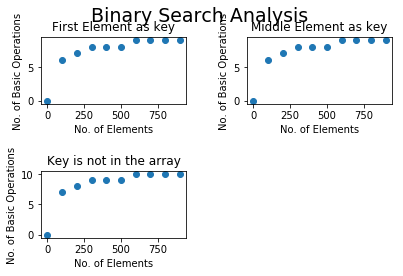

In [13]:
bin_visualizer.analyze()

## `compare(algs)`

`algs` is a list of classes derived from `SearchingAlgorithm`. It performs tests and plots the bar graph comapring the number of basic operations performed by each algorithm.


## Example File

You can see more examples at [Github](https://github.com/OpenWeavers/OpenAlgorithm/blob/master/Python/AnalysisTest/searching.py)